In [ ]:
import fastbook
fastbook.setup_book()

In [1]:
from fastbook import *
!pip install -Uqq fastai duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
from fastdownload import download_url
# search and save
def search_and_save(term):
    dest = f'{term}.jpg'
    urls = search_images(term)
    download_url(urls[0], dest, show_progress=False)
    return dest

Searching for 'forest'


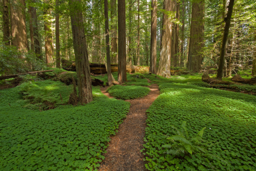

In [7]:
term = 'forest'
dest = search_and_save(term)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'tree'


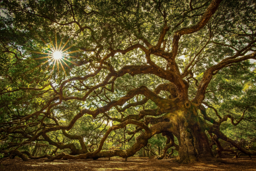

In [8]:
term = 'tree'
dest = search_and_save(term)
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
searches = 'forest', 'tree'
path = Path('forest_from_tree')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'tree photo'
Searching for 'tree sun photo'
Searching for 'tree shade photo'


In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

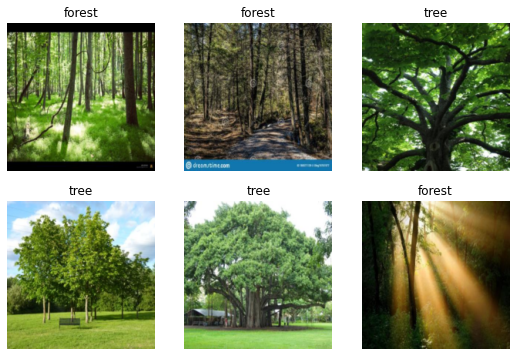

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
is_art,_,probs = learn.predict(PILImage.create('tree.jpg'))

print(f"This is a: {is_art}.")
print(f"Probability it's pop: {probs[1]:.4f}")

This is a: tree.
Probability it's pop: 0.9900


In [20]:
is_art,_,probs = learn.predict(PILImage.create('forest.jpg'))

print(f"This is a: {is_art}.")
print(f"Probability it's pop: {probs[0]:.4f}")

This is a: forest.
Probability it's pop: 0.9999
